<a href="https://colab.research.google.com/github/MarialuizaLeao/edc/blob/master/trabalhoEDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import e

# Função para obter a posição

Se tiverssemos escrito desde o começo a equação em função da posição, teriamos uma equação diferencial de segunda ordem. Para resolver esse problema com python utilizamos essa abordagem.
Sabemos que:
$\frac{d}{dt}V(t) + \frac{k}{m} V(t) = (0,-g)$
e que $V(t) = \frac{d}{dt} S(t)$
Logo, podemos escrever como:
$\frac{d^2}{dt^2} S(t) + \frac{k}{m} \frac{d}{dt} S(t) = (0,-g)$
Como a biblioteca scipy só resolve equações diferenciais de primeira ordem, escreveremos a equação acima como o seguinte sistema:
*   $\frac{d}{dt} S_x(t) = V_x(t) $
*   $\frac{d}{dt} V_x(t) = - \frac{k}{m}V_x(t)$
*   $\frac{d}{dt} S_y(t) = V_y(t) $
*   $\frac{d}{dt} V_y(t) = - g - \frac{k}{m}V_y(t)$

A função recebe como parâmetros:
*   t = intervalo de integração
*   S = uma lista com [$\frac{d}{dt}S_x(t)$, $\frac{d}{dt}V_x(t)$, $\frac{d}{dt}S_y(t)$, $\frac{d}{dt}V_y(t)$]
*   k = intensidade da resistência do ar
*   g = gravidade
*   m = massa

Ela retorna uma lista com [$V_x(t)$, $\frac{d}{dt}V_x(t)$, $V_y(t)$, $\frac{d}{dt}V_y(t)$]

In [2]:
def dSdt(t,S,k,g,m):
  Sx, vx, Sy, vy = S
  return  [vx,
           -k/m*vx,
           vy,
          -g-k/m*vy]

# Iniciação de valores

In [5]:
rho = 1.225  # densidade do ar
Cd = 0.2
g = 9.80665  # aceleração da gravidade 
m = 0.430  # massa
area = 0.38
k = 0.5 * area * rho * Cd
V = 20 # velocidade do lançamento(m/s)
angulo1 = 45 * (np.pi / 180)  # angulo de lançamento

# Resolução com scipy

Vamos utilizar a função **solve_ivp**. Como parÂmetros de entrada, ela receberá a função dSdt que representa nossa equação, o intervalo de integração(t de inicio e t final) e a condição inicial. Nesse caso, temos que a posição inicial é 0 tanto pro x quanto pro y e a velociade inicial sera determinada pela velocidade * vetores de direção para cada coordenada, como visto anteriormente.

In [6]:
def Vx0(angulo):
   return V * np.cos(angulo)  # Velocidade inicial em relação a coordenada x
def Vy0(angulo):
   return V * np.sin(angulo)  # Velocidade inicial em relação a coordenada y
solucao1 = solve_ivp(dSdt, [0,10], y0 = [0, Vx0(angulo1), 0, Vy0(angulo1)], t_eval = np.linspace(0,10,1000), args = (k,g,m,), atol=1e-7, rtol=1e-4) 
solucao2 = solve_ivp(dSdt, [0,10], y0 = [0, Vx0(angulo1), 0, Vy0(angulo1)], t_eval = np.linspace(0,10,1000), args = (0,g,m,), atol=1e-7, rtol=1e-4)

Plotando os resultados obtidos:

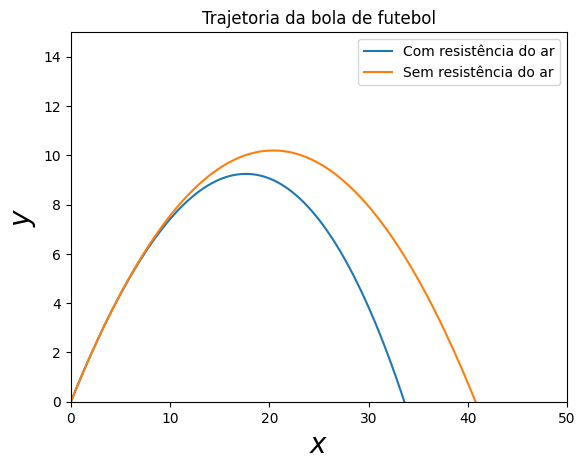

In [7]:
plt.plot(solucao1.y[0], solucao1.y[2], label=r'Com resistência do ar')
plt.plot(solucao2.y[0], solucao2.y[2], label=r'Sem resistência do ar')
plt.ylim(0,15)
plt.xlim(0,50)
plt.legend()
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.title('Trajetoria da bola de futebol')
plt.show()

In [8]:
def distancia(angulo, k,g,m, V=1, t=2):
  v0x = Vx0(angulo * (np.pi / 180))
  v0y = Vy0(angulo * (np.pi / 180))
  solucao = solve_ivp(dSdt, [0,10], y0 = [0, v0x, 0, v0y], t_eval = np.linspace(0,10,1000), args = (k,g,m,), atol=1e-7, rtol=1e-4) 
  sobX = np.where(np.diff(np.sign(solucao.y[2])) < 0)[0][0]
  baixoX = sobX + 1
  x_loc = (solucao.y[0][sobX] + solucao.y[0][baixoX])/2
  return x_loc

In [9]:
print(f'Distância com lançamento à 45 graus:  {distancia(45, k,g,m)}')
print(f'Distância com lançamento à 45 graus:  {distancia(45, 0,g,m)}')

Distância com lançamento à 45 graus:  33.61236843747396
Distância com lançamento à 45 graus:  40.84090217664044


# Encontrando o melhor ângulo de lançamento

In [10]:
angulos = np.linspace(30, 80, 1000)
xDistancias = np.vectorize(distancia)(angulos, k,g,m)

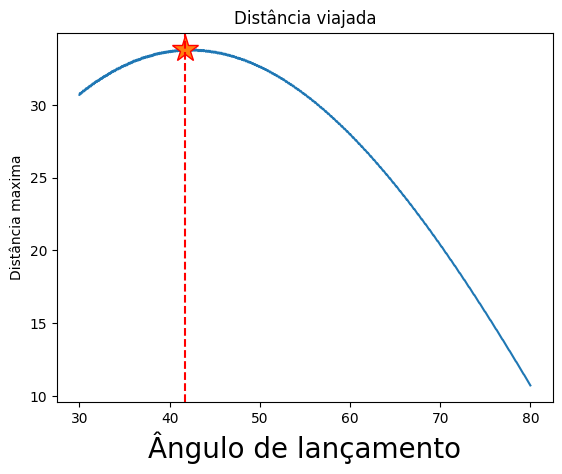

Distância máxima de 33.806481970649486 com o ângulo de 41.711711711711715 graus


In [11]:
plt.plot(angulos, xDistancias)
plt.xlabel('Ângulo de lançamento', fontsize=20)
plt.ylabel('Distância maxima')
plt.plot(angulos[np.argmax(xDistancias)], xDistancias[np.argmax(xDistancias)], marker = '*', markersize = 20, markeredgecolor="red", label =r'Ponto com distância máxima')
plt.axvline(angulos[np.argmax(xDistancias)], ls='--', color='r')
plt.title('Distância viajada')
plt.show()
print(f'Distância máxima de {xDistancias[np.argmax(xDistancias)]} com o ângulo de {angulos[np.argmax(xDistancias)]} graus')